In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_input = pd.read_csv('Credit_Risk_Train_data.csv')
validate_input = pd.read_csv('Credit_Risk_Validate_data.csv')

In [3]:
print(train_input.columns)
print(validate_input.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')


In [4]:
"""The last column has differet names in both.
lets make them same and merge them together
so that we can fill the missing values simultaneously"""

validate_input.rename(columns={'outcome':"Loan_Status"}, inplace = True)

In [5]:
data_all = pd.concat([train_input, validate_input], ignore_index = True)

In [6]:
data_all.shape

(981, 13)

In [7]:
data_all.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


# Exploratory Data Analysis (EDA)

## Missing Value Preprocessing

<AxesSubplot:>

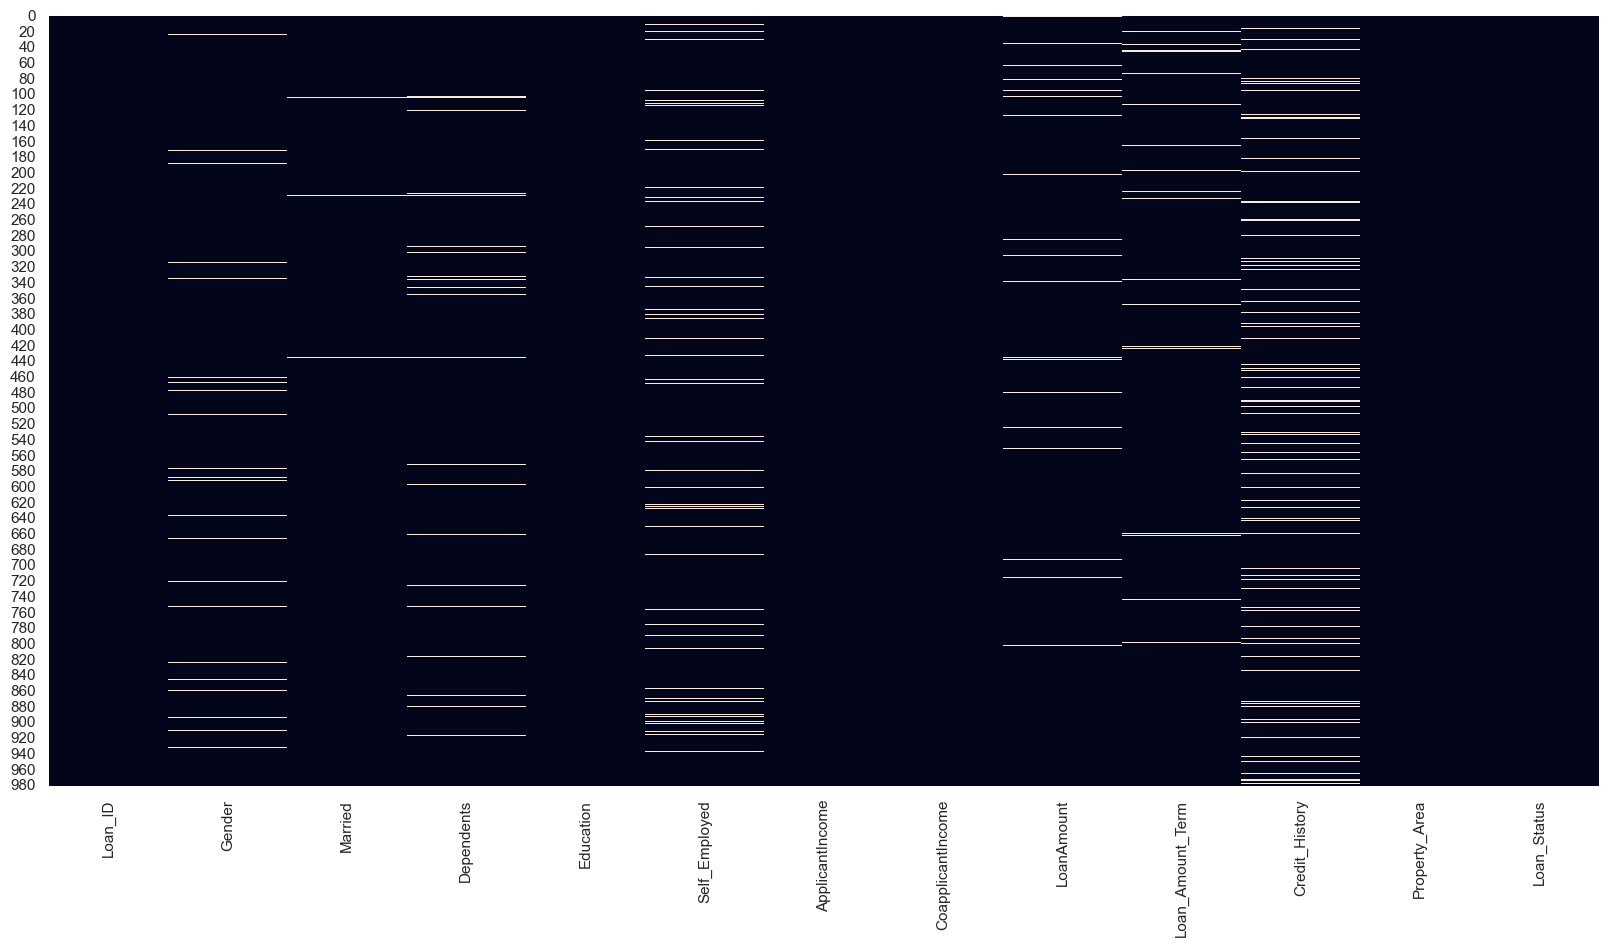

In [8]:
plt.figure(figsize= (20,10))
sns.heatmap(data_all.isnull(), cbar = False)

In [9]:
data_all.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

## NaN Fill with Mode

In [10]:
Counter(data_all['Gender'])

Counter({'Male': 775, 'Female': 182, nan: 24})

In [11]:
data_all.fillna({'Gender':'Male'}, inplace = True)

In [12]:
#check if filled
Counter(data_all['Gender'])

Counter({'Male': 799, 'Female': 182})

In [13]:
#Lets fill Married now
print(Counter(data_all["Married"])) #most are married

Counter({'Yes': 631, 'No': 347, nan: 3})


In [14]:
data_all.fillna({'Married':'Yes'}, inplace = True)

In [15]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

## NaN fill with Cross Tab

In [16]:
Counter(data_all['Dependents'])

Counter({'0': 545, '1': 160, '2': 160, '3+': 91, nan: 25})

In [17]:
#lets see the dependents wrt marriage
pd.crosstab(data_all["Married"], data_all['Dependents'].isnull())

Dependents,False,True
Married,,
No,338,9
Yes,618,16


In [18]:
pd.crosstab(data_all['Dependents'], data_all['Married'])

Married,No,Yes
Dependents,,
0,276,269
1,36,124
2,14,146
3+,12,79


In [19]:
bachelor_nulldependent = data_all[(data_all['Married']=='No') & 
                                  (data_all['Dependents'].isnull())].index.tolist()
print(bachelor_nulldependent)

#For the bachelors, lets fill the missing dependentts as 0
#lets find the index of all rows with dependents missing and Married NO

[293, 332, 355, 597, 684, 752, 879, 916, 926]


In [20]:
data_all['Dependents'].iloc[bachelor_nulldependent]= '0'

In [21]:
Counter(data_all['Dependents'])

Counter({'0': 554, '1': 160, '2': 160, '3+': 91, nan: 16})

In [22]:
pd.crosstab(data_all["Gender"], data_all['Dependents'])
"""For the remaining missing 16 dependents
lets see how many dependents male and female have"""

'For the remaining missing 16 dependents\nlets see how many dependents male and female have'

In [23]:
pd.crosstab(data_all['Gender'],data_all['Dependents'].isnull())
#lets see the gender of the 16 missing dependents

Dependents,False,True
Gender,,
Female,181,1
Male,784,15


In [24]:
pd.crosstab((data_all['Gender']=='Male')&
           (data_all['Married']=='Yes'), data_all['Dependents'])

Dependents,0,1,2,3+
row_0,,,,
False,318,48,23,15
True,236,112,137,76


In [25]:
#lets sfill the #dependent with 1
data_all['Dependents'].iloc[data_all[data_all['Dependents'].isnull()].index.tolist()] = '1'

In [26]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
Counter(data_all['Self_Employed'])

Counter({'No': 807, 'Yes': 119, nan: 55})

In [28]:
data_all.fillna({'Self_Employed':'No'}, inplace = True)

In [29]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

### NaN fill with Mean

In [30]:
#To check if any row with both LoanAmount and Loan_Amount_Term as NAN
pd.crosstab(data_all['LoanAmount'].isnull(),
           data_all['Loan_Amount_Term'].isnull())

Loan_Amount_Term,False,True
LoanAmount,,
False,934,20
True,27,0


In [31]:
pd.crosstab(data_all['LoanAmount'].isnull(), data_all['Loan_Amount_Term'])

Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
LoanAmount,,,,,,,,,,,,
False,1,2,3,3,7,4,64,7,20,1,800,22
True,0,0,0,0,0,0,2,1,0,0,23,1


In [32]:
data_all.groupby(data_all['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
6.0       95.000000
12.0     185.500000
36.0     117.666667
60.0     139.666667
84.0     121.142857
120.0     36.750000
180.0    131.125000
240.0    128.857143
300.0    166.250000
350.0    133.000000
360.0    144.420000
480.0    137.181818
Name: LoanAmount, dtype: float64

In [33]:
#lets fill the missing values in the LoanAmount
#with the mean of the respective loan term
#we see that 180 & 240 has almost the same Loan Amount 128 - 131 & 360 i.e 144
# so lets fill only 360 by 144 & and all remaining by 130 

data_all['LoanAmount'][(data_all['LoanAmount'].isnull()) & (data_all['Loan_Amount_Term']== 360)]=144
data_all['LoanAmount'][(data_all['LoanAmount'].isnull()) & (data_all['Loan_Amount_Term']== 480)]=137

In [34]:
data_all['LoanAmount'][(data_all['LoanAmount'].isnull())] = 130

In [35]:
#lets fill Loan Amount Term
(data_all['Loan_Amount_Term']).value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [36]:
#Lets fill the loan tenure by the mode i,e 360
data_all['Loan_Amount_Term'][data_all['Loan_Amount_Term'].isnull()]= 360

In [37]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
data_all['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [39]:
data_all.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.547235,-0.023823,0.023378
CoapplicantIncome,-0.114247,1.000000,0.178476,-0.042750,-0.027253
LoanAmount,0.547235,0.178476,1.000000,0.054260,-0.008206
Loan_Amount_Term,-0.023823,-0.042750,0.054260,1.000000,-0.023204
Credit_History,0.023378,-0.027253,-0.008206,-0.023204,1.000000


In [40]:
pd.crosstab(data_all['Gender'], data_all['Credit_History'])
#"""Gender makes no difference"""

Credit_History,0.0,1.0
Gender,,
Female,30,135
Male,118,619


In [41]:
pd.crosstab(data_all['Self_Employed'], data_all['Credit_History'])
#Self_Employed makes no diffference

Credit_History,0.0,1.0
Self_Employed,,
No,134,658
Yes,14,96


In [42]:
pd.crosstab(data_all['Education'], data_all['Credit_History'])
#Education makes no difference

Credit_History,0.0,1.0
Education,,
Graduate,106,596
Not Graduate,42,158


In [43]:
pd.crosstab(data_all['Married'], data_all['Credit_History'])
#Married makes no difference

Credit_History,0.0,1.0
Married,,
No,56,263
Yes,92,491


In [44]:
data_all.fillna({'Credit_History':1}, inplace = True)

In [45]:
data_all.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Categorical Feature Engg.

In [46]:
data_all.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
data_all['Dependents'].value_counts()

0     554
1     176
2     160
3+     91
Name: Dependents, dtype: int64

In [48]:
data_all['Dependents'][data_all['Dependents']=='3+']='3'

In [49]:
data_all['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

In [50]:
data_all['Dependents'] = data_all['Dependents'].astype(int)
data_all['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: int32

In [51]:
data_all_new = pd.get_dummies(data_all.drop(['Loan_ID'], axis=1),
                              drop_first = True)

In [52]:
data_all_new.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [53]:
X = data_all_new.drop(['Loan_Status_Y'], axis =1)
y = data_all_new['Loan_Status_Y']

In [54]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [55]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8

## Data Spliting 

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [58]:
X_train.shape

(735, 12)

In [59]:
X_test.shape

(246, 12)

## Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
#Fit only to the train data
scaler.fit(X)

StandardScaler()

In [63]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
X_train[:5]

array([[ 0.2106796 ,  0.39900293, -0.5895062 ,  0.01962262,  0.2705276 ,
         0.42151046, -2.09525891, -1.35169869, -0.53452248,  2.6914118 ,
         1.34569248, -0.73158135],
       [ 1.18556961, -0.30792923, -0.5895062 , -0.05900143,  0.2705276 ,
         0.42151046, -2.09525891, -1.35169869, -0.53452248, -0.37155221,
        -0.74311183,  1.36690199],
       [-0.76421042, -0.38926859, -0.5895062 , -0.7666179 ,  0.2705276 ,
        -2.37242036,  0.47726799, -1.35169869, -0.53452248, -0.37155221,
         1.34569248, -0.73158135],
       [ 1.18556961, -0.40525538,  0.09939096, -0.13762548,  0.2705276 ,
        -2.37242036,  0.47726799,  0.73980985, -0.53452248, -0.37155221,
         1.34569248, -0.73158135],
       [ 2.16045962, -0.14876409,  0.07694292,  0.22928676,  0.2705276 ,
        -2.37242036,  0.47726799,  0.73980985, -0.53452248, -0.37155221,
        -0.74311183,  1.36690199]])

## Training the model using K-nn

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
parameters = {'n_neighbors':[3,5,11,19],
             'weights': ['uniform','distance'],
             'metric': ['minkowski','manhattan']}

In [68]:
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv = 3,
                  verbose = 1, n_jobs = -1)

In [69]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [70]:
clf.best_score_

0.8476190476190476

In [71]:
clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'uniform'}

In [72]:
clf = KNeighborsClassifier(metric='minkowski', n_neighbors = 19,
                          weights = 'uniform')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [75]:
confusion_matrix(y_test, y_pred)

array([[ 32,  34],
       [  1, 179]], dtype=int64)

In [76]:
accuracy_score(y_test, y_pred)

0.8577235772357723

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.48      0.65        66
           1       0.84      0.99      0.91       180

    accuracy                           0.86       246
   macro avg       0.91      0.74      0.78       246
weighted avg       0.88      0.86      0.84       246



In [78]:
help(np.generic)

Help on class generic in module numpy:

class generic(builtins.object)
 |  Base class for numpy scalar types.
 |  
 |  Class from which most (all?) numpy scalar types are derived.  For
 |  consistency, exposes the same API as `ndarray`, despite many
 |  consequent attributes being either "get-only," or completely irrelevant.
 |  This is the class from which it is strongly suggested users should derive
 |  custom scalar types.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __array__(...)
 |      sc.__array__(dtype) return 0-dim array from scalar with specified dtype
 |  
 |  __array_wrap__(...)
 |      sc.__array_wrap__(obj) return scalar from array
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __copy__(...)
 |  
 |  __deepcopy__(...)
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  


In [80]:
#help('modules')

In [62]:
#!pip install -U scikit-learn

     ---------------------------------------- 8.2/8.2 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import sklearn as sk

In [84]:
print(sk.__version__)

1.2.0
